In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#random.seed(0)
import collections
import math

Counter({52.0: 4, 4.0: 4, 87.0: 3, 71.0: 3, 27.0: 3, 90.0: 3, 47.0: 3, 15.0: 2, 31.0: 2, 8.0: 2, 98.0: 2, 40.0: 2, 0.0: 2, 9.0: 2, 64.0: 2, 97.0: 2, 39.0: 2, 65.0: 2, 34.0: 2, 33.0: 2, 44.0: 1, 25.0: 1, 48.0: 1, 56.0: 1, 75.0: 1, 88.0: 1, 49.0: 1, 46.0: 1, 80.0: 1, 81.0: 1, 18.0: 1, 99.0: 1, 63.0: 1, 72.0: 1, 67.0: 1, 21.0: 1, 82.0: 1, 11.0: 1, 10.0: 1, 85.0: 1, 45.0: 1, 79.0: 1, 86.0: 1, 13.0: 1, 1.0: 1, 68.0: 1, 55.0: 1, 94.0: 1, 93.0: 1, 74.0: 1, 70.0: 1, 37.0: 1, 53.0: 1, 20.0: 1, 58.0: 1, 78.0: 1, 62.0: 1, 16.0: 1, 28.0: 1, 54.0: 1, 29.0: 1, 23.0: 1, 17.0: 1, 7.0: 1, 32.0: 1, 41.0: 1, 84.0: 1, 69.0: 1, 42.0: 1, 30.0: 1, 73.0: 1})


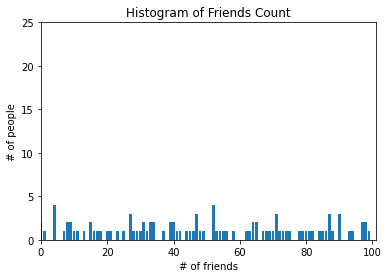

In [ ]:
#Generating random values in some range
num_friends = [100*random.random()//1 for i in range(100)] 
#For large datasets we use Histogram for finding out thye features 
friend_counts = collections.Counter(num_friends)
print(friend_counts)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friends Count")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [ ]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
sorted_values = sorted(num_friends)
#From sorted we can have them accesed in Random Time O(1) Time
print(num_points, largest_value, smallest_value)

100 99.0 0.0


In [ ]:
def mean(X):
  return sum(X)/len(X)

def median(X):
  n = len(X)
  sorted_X =  sorted(X)
  midpoint = n//2

  if n%2 == 1:
    return sorted_X[midpoint]
  else:
    return (sorted_X[midpoint-1] + sorted_X[midpoint])/2

mean(num_friends)
median(num_friends)
print(mean(num_friends),median(num_friends))

#Mean is highly sensitive to outliers if it is
#bad data, then it paints a misleading information
#Median is not sensitive to outliers

49.07 47.5


In [ ]:
def quantile(X, p):
  """Returns the pth percentile value in X"""
  #Type Casting 
  p_index = int(p*len(X))
  return sorted(X)[p_index]

print(quantile(num_friends, 0.10), quantile(num_friends, 0.25), quantile(num_friends, 0.75),quantile(num_friends, 0.99))

9.0 27.0 73.0 99.0


In [ ]:
def mode(X):
  counts = collections.Counter(X)
  #Since its a dictionary
  max_count = max(counts.values())
  #Find and extract using List Comprehensions
  return [x_i for x_i, count in counts.items() if count == max_count]

print(mode(num_friends))

[52.0, 4.0]


In [ ]:
#Dispersion

def vector_sum(vectors):
  """sums all corresponding elements"""
  result = vectors[0] # start with the first vector
  for vector in vectors[1:]: # then loop over the others
    result = vector_add(result, vector) # and add them to the result
  return result

def dot(v, w):
  """v_1 * w_1 + ... + v_n * w_n"""
  return sum(v_i * w_i
  for v_i, w_i in zip(v, w))

def sum_of_squares(v):
  """v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

def data_range(X):
  return max(X)-min(X)

print(data_range(num_friends))

#To make it DATA dependent,we use the variance
def de_mean(X):
  X_bar = mean(X)
  return [x_i - X_bar for x_i in X]

def variance(X):
  n = len(X)
  deviations = de_mean(X)
  return sum_of_squares(deviations)/(n-1)

def standard_deviation(x):
  return math.sqrt(variance(x))

def interquartile_range(X):
  return quantile(X, 0.75) - quantile(X, 0.25) 

print(standard_deviation(num_friends))
print(interquartile_range(num_friends))

def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y))/(n-1)

daily_minuts = num_friends[:]

print(covariance(num_friends, daily_minuts))
#Expectation is biasing towards positives and negatives
#There is some ambiguosness in the value of what is large Cov.

#Thats why we prefer CORRELATION
def correlation(x, y):
  stdev_x = standard_deviation(x)
  stdev_y = standard_deviation(y)

  if stdev_x > 0 and stdev_y >0:
    return covariance(x, y) / stdev_x / stdev_y
  else:
    return 0

print(correlation(num_friends, daily_minuts))
#Here we have perfect correlation

99.0
29.079568654491993
46.0
845.6213131313132
0.9999999999999999
